-----

### 엑셀 파일 전처리

In [74]:
import pandas as pd

In [1]:
folderName = "SMARTSTORE20201001_1"

# file list
originFileL = []
fileName = "./" + folderName + "/SMARTSTORE_1.xls"
originFileL.append(fileName)
originFileL

['./SMARTSTORE20201001_1/SMARTSTORE_1.xls']

In [106]:
for file in originFileL:
    ss = pd.read_excel(file)
    
    # 자동 업로드 안되는 요소 제거
    ss["상품 상세정보"] = [x.replace("IMG align=absMiddle ", "") for x in ss["상품 상세정보"]]
    
    ss.to_excel(file.replace("1.xls", "new.xls"))

---

###  제목 변경

In [107]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rc('font', family='Nanum Gothic') # for mac
plt.rc('font', family='Malgun Gothic') # for window

In [108]:
# file list
newFileL = []
for i in range(9):
    fileName = "./20200823/SMARTSTORE_1 ("+str(i)+")/SMARTSTORE_new.xls"
    newFileL.append(fileName)
newFileL

['./20200823/SMARTSTORE_1 (0)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (1)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (2)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (3)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (4)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (5)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (6)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (7)/SMARTSTORE_new.xls',
 './20200823/SMARTSTORE_1 (8)/SMARTSTORE_new.xls']

In [109]:
def reTitle(title):
    if(len(title) < 16):
        cutNum = -1
    else:
        cutNum = title[15:].find(" ") + 15
    if(cutNum == -1):
        return title
    return title[:cutNum]+"\n"+title[cutNum+1:]

In [110]:
# 사용할 file, row 범위 
file = newFileL[0]
row = (0, 10)
plt.rcParams["figure.figsize"] = (15,7)

# 초기에 한번만 (아래 MyFile 부분 주석)
ss = pd.read_excel(file)

imgDir = file.replace("SMARTSTORE_new.xls", "prdimg1/")
myFile = file.replace("_new.xls", "_my.xls")
# ss = pd.read_excel(myFile)
# ss = ss.drop("Unnamed: 0", axis = 1)

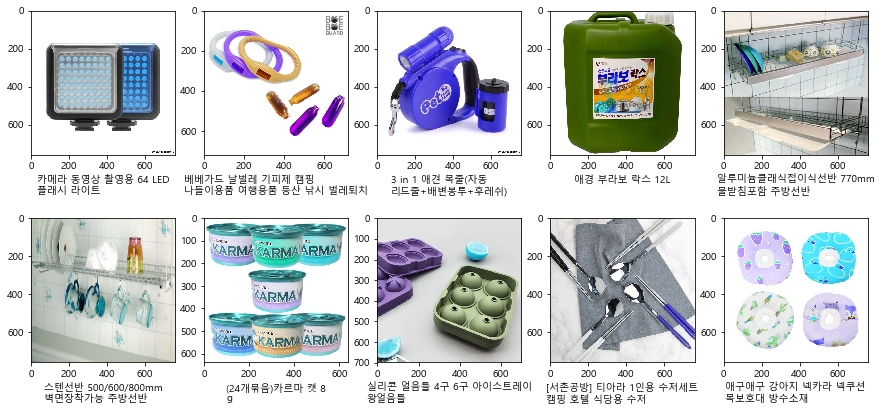

In [84]:
# 이미지 1줄에 5개씩 출력
fig = plt.figure()
plt.tight_layout()
for i in range(row[0], row[1]):
    imgFileName = ss.iloc[i]["대표 이미지 파일명"]
    title = ss.iloc[i]["상품명"]
    img = cv2.imread(imgDir + imgFileName)
    ax1 = fig.add_subplot((row[1]-row[0])//5 , 5, i-row[0]+1)
    ax1.imshow(img)
    ax1.set_xlabel(reTitle(title), multialignment= "left")

In [85]:
# 새 정보 넣기 (판매자 특이사항에 라벨링 m(modified))
newTitle = [
    "로얄 고양이 수프 파우치",
    "모기 퇴치팔찌 밴드 야외 유아용",
    "강아지 자동리드줄 봉투 보관함 라이트 포함",
    "락스 살균 소독 욕실청소 업소용",
    "프리미엄 주방 싱크대 선반 씽크대 정리",
    "프리미엄 주방 싱크대 스테인리스 선반 씽크대 정리",
    "고양이 간식 고양이 캔",
    "말랑 다용도 큰 얼음 틀 냉동실 얼음통",
    "고급 나혼자 수저 세트",
    "강아지넥카라 고양이넥카라 중형견 애견 넥쿠션 고양이목보호대 중성화수술후"
]
ss.iloc[row[0]:row[1]]["상품명"] = newTitle
ss.iloc[row[0]:row[1]]["판매자 특이사항"] = "m"
ss.to_excel(myFile)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [122]:
# ss[["상품명","판매자 특이사항"]].head(50)

---

### 파일 저장하기

In [114]:
printRow = (0,50)

printFile = file.replace("_new.xls", "_"+str(printRow[0])+"_"+str(printRow[1])+".xls")
ss["원산지 코드"] = ss["원산지 코드"].replace(4, "04")
ss.iloc[printRow[0]:printRow[1]].to_excel(printFile, index=False, sheet_name="ver.2.1")